In [1]:
conda install -c districtdatalabs yellowbrick

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## Uffi Nadzima
### Final Project BDA DTS UNS 2019

## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Exploring Data

In [3]:
data=pd.read_csv("heart.csv")
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Terdapat 10 variable:

1.  sbp         : tekanan darah sistolik
2.  tobacco     : Konsumsi tembakau kumulatif, dalam kg
3.  ldl         : kolesterol lipoprotein densitas rendah
4.  adiposity   : konsentrasi jaringan adiposa
5.  famhist     : Sejarah keluarga penyakit jantung (1 = Sekarang, 0 = Tidak Ada)
6.  typea       : Skor pada tes yang dirancang untuk mengukur perilaku tipe-A
7.  obesity     : Obesitas
8.  alcohol     : Konsumsi alkohol saat ini
9.  age         : usia subjek
10. chd         : Penyakit jantung koroner pada awal; 1 = Ya 0 = Tidak

Setiap baris berikut berisi informasi dari satu pasien. Ada total 462 sampel.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [5]:
data.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [6]:
data.count()

sbp          462
tobacco      462
ldl          462
adiposity    462
famhist      462
typea        462
obesity      462
alcohol      462
age          462
chd          462
dtype: int64

In [7]:
np.sum(data.isnull())

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [8]:
data.corr()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
sbp,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954,0.254121
typea,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125,0.062531
age,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000,0.372973
chd,0.192354,0.299718,0.263053,0.254121,0.103156,0.100095,0.062531,0.372973,1.000000


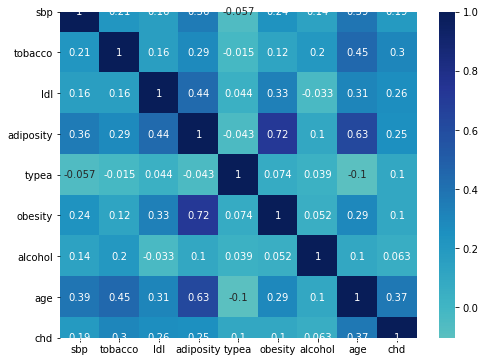

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(), center=0, annot=True, cmap="YlGnBu")

## Scatter Plot

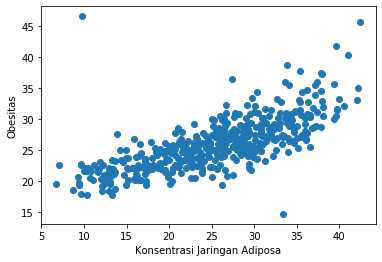

In [10]:
plt.scatter(data['adiposity'],data['obesity'])
plt.xlabel('Konsentrasi Jaringan Adiposa')
plt.ylabel('Obesitas')
plt.show()

In [11]:
data2=data.filter(items=['adiposity', 'obesity'])
data2

,adiposity,obesity
0,23.11,25.30
1,28.61,28.87
2,32.28,29.14
3,38.03,31.99
4,27.78,25.99
5,36.21,30.77
6,16.20,20.81
7,14.60,23.11
8,19.40,24.86
9,30.96,30.11


## Removing Outlier

In [12]:
meanadiposity = data['adiposity'].mean()
stdadiposity = data['adiposity'].std()
meanobesity = data['obesity'].mean()
stdobesity = data['obesity'].std()

databersih=data[(np.abs((data['adiposity']-meanadiposity)/stdadiposity)<=2)
               & (np.abs((data['obesity']-meanobesity)/stdobesity)<=2)]

databersih

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


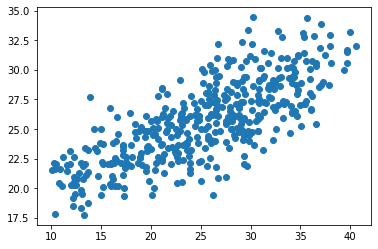

In [13]:
plt.scatter(databersih['adiposity'],databersih['obesity'])
plt.show()

## Simple Regression

In [14]:
data2=databersih.filter(items=['ldl','obesity'])
data2.head()

,ldl,obesity
0,5.73,25.30
1,4.41,28.87
2,3.48,29.14
3,6.41,31.99
4,3.50,25.99


In [15]:
x = data2['ldl'].values.reshape(-1,1)
y = data2['obesity'].values.reshape(-1,1)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=1/3,random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print('intercept:',regressor.intercept_)
print('slope:',regressor.coef_)

intercept: [23.25112744]
slope: [[0.52390465]]


Dari hasil di atas diperoleh model regresi sederhana yaitu $y=0.35523342x+16.70266666$ artinya untuk setiap satuan __adiposity__ akan meningkatkan $0.35523342$ __obesity__ 

In [19]:
y_pred = regressor.predict(x_test)

In [20]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,21.83,25.435810
1,20.60,26.347404
2,26.15,24.927622
3,25.89,27.971508
4,26.81,24.796646
5,25.71,26.342165
6,22.03,24.723299
7,31.03,26.195472
8,26.64,24.807124
9,26.20,27.358540


## Validasi Data

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print('Mean absolute error: %.2f' % np.mean(np.absolute(y_pred-y_test)))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
from sklearn.metrics import r2_score
print('R2-score: %.2f' % r2_score(y_test, y_pred))

Mean absolute error: 2.48
MSE: 9.34
R2-score: 0.19


In [22]:
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mean_absolute_percentage_error(y_test, y_pred)

9.91058182632086

## Clustering

In [23]:
X=databersih.filter(items=['tobacco','chd'])
X.head()

,tobacco,chd
0,12.00,1
1,0.01,1
2,0.08,0
3,7.50,1
4,13.60,1


In [24]:
X=X.values

In [25]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [26]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to D

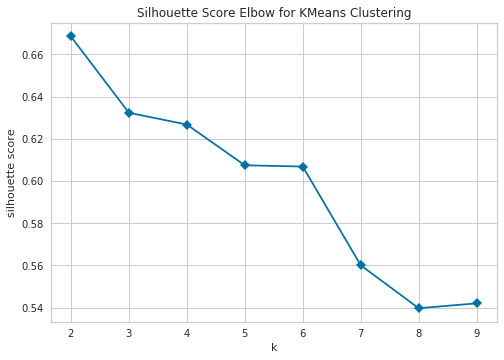

In [27]:
visualizer.fit(X)    
visualizer.poof()

In [28]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

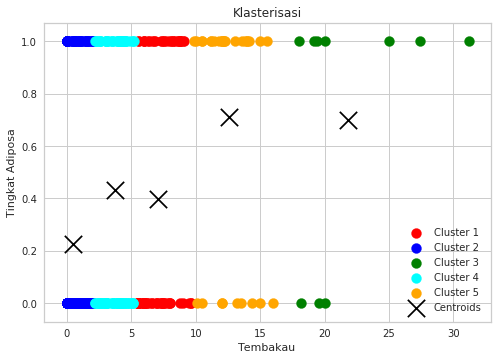

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, marker='x', c = 'black', label = 'Centroids')
plt.title('Klasterisasi')
plt.xlabel('Tembakau')
plt.ylabel('Tingkat Adiposa')
plt.legend()
plt.show()